# Tokenização

**Texto a analisar**

In [31]:
# Notar o uso do apóstrofo
texto = "O rato roeu a roupa do Rei de Roma. Em seguida, jogou-se n'água do Mar Tirreno... Calcula-se que o prejuízo tenha sido alto: R$ 10.000,00."

**Manual**

In [32]:
tokens = texto.split()
print(tokens)

['O', 'rato', 'roeu', 'a', 'roupa', 'do', 'Rei', 'de', 'Roma.', 'Em', 'seguida,', 'jogou-se', "n'água", 'do', 'Mar', 'Tirreno...', 'Calcula-se', 'que', 'o', 'prejuízo', 'tenha', 'sido', 'alto:', 'R$', '10.000,00.']


**NLTK**

Vantagens: 

*   É possível tokenizar não só palavras, mas também sentenças.
*   O tokenizador considera especificidades linguísticas, como apóstrofos e hífens.



In [33]:
# Importação do módulo e dos recursos necessários
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
# Tokenização de palavras e pontuação
from nltk import tokenize    
tokens = tokenize.word_tokenize(texto, language='portuguese')
print(tokens)

['O', 'rato', 'roeu', 'a', 'roupa', 'do', 'Rei', 'de', 'Roma', '.', 'Em', 'seguida', ',', 'jogou-se', "n'água", 'do', 'Mar', 'Tirreno', '...', 'Calcula-se', 'que', 'o', 'prejuízo', 'tenha', 'sido', 'alto', ':', 'R', '$', '10.000,00', '.']


In [35]:
# Tokenização de sentenças
sent_tokenizer = nltk.data.load('tokenizers/punkt/portuguese.pickle')
sents = sent_tokenizer.tokenize(texto)
print(sents)

['O rato roeu a roupa do Rei de Roma.', "Em seguida, jogou-se n'água do Mar Tirreno...", 'Calcula-se que o prejuízo tenha sido alto: R$ 10.000,00.']


**spaCy** 

Vantagem:

*   É o que mais bem funciona em geral.

Desvantagens:


*   Os modelos têm de estar pré-instalados;
*   O carregamento dos modelos na memória é lento;
*   Ocupa mais memória que o NLTK.


In [36]:
# Instalação/atualização do spaCy e dos modelos de língua
!pip install -U spacy

!python -m spacy download pt_core_news_sm  # Notar o "sm": Small Model

Requirement already up-to-date: spacy in /usr/local/lib/python3.7/dist-packages (3.0.3)
2021-02-26 01:08:50.065769: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [37]:
# Importação do módulo e do modelo de língua
import spacy
!python -m spacy info  # P/ checar a versão (tem de ser >= 3.0)
nlp = spacy.load('pt_core_news_sm')

2021-02-26 01:09:15.664855: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1

============================== Info about spaCy ==============================

spaCy version    3.0.3                         
Location         /usr/local/lib/python3.7/dist-packages/spacy
Platform         Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
Python version   3.7.10                        
Pipelines        pt_core_news_lg (3.0.0), pt_core_news_sm (3.0.0)



In [38]:
# Tokenização de palavras e pontuação
def tokenizar(string):
    doc = nlp(string)
    return [t.text for t in doc]  #  Lista de atributos .text de cada token

tokens = tokenizar(texto)
print(tokens)

['O', 'rato', 'roeu', 'a', 'roupa', 'do', 'Rei', 'de', 'Roma', '.', 'Em', 'seguida', ',', 'jogou-se', "n'água", 'do', 'Mar', 'Tirreno', '...', 'Calcula-se', 'que', 'o', 'prejuízo', 'tenha', 'sido', 'alto', ':', 'R$', '10.000,00', '.']


In [39]:
# Tokenização de sentenças
def sents(string):
    doc = nlp(string)
    return doc.sents 

for s in sents(texto):
    print(s)

O rato roeu a roupa do Rei de Roma.
Em seguida, jogou-se n'água do Mar Tirreno...
Calcula-se que o prejuízo tenha sido alto: R$ 10.000,00.


# Limpeza

In [10]:
def limpar(lista):
    return [i.lower() for i in lista if i.isalpha()]

# Palavras vazias

**NLTK**

*   Uma lista pequena, mas rápida de se carregar.

In [ ]:
nltk.download('stopwords')
stops_nltk = nltk.corpus.stopwords.words('portuguese')

len(stops_nltk)

**spaCy**


*   Uma lista mais abrangente, mas mais lenta e com mais exigência de memória para carregar o modelo.
* Atenção! A "lista" do spaCy é, na verdade, um conjunto (set).




In [ ]:
stops_spacy = nlp.Defaults.stop_words

len(stops_spacy)

**União das duas listas**

In [ ]:
stops = set(stops_nltk) | stops_spacy

len(stops)

# Stemização
Exclusivamente no NLTK

In [40]:
# Carregamento do stemizador
nltk.download('rslp')
raiz = nltk.stem.RSLPStemmer().stem

print(raiz('nada'))
print(raiz('nadinha'))
print(raiz('nadabóbora'))

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
nad
nad
nadabób


# Lematização


*   Exclusivamente no spaCy
*   O resultado tem muitos erros mas, ao usar o modelo grande (large), a performance melhora.



In [41]:
# Baixando o modelo de língua grande (lg) para o português
!python -m spacy download pt_core_news_lg

nlp = spacy.load('pt_core_news_lg')

2021-02-26 01:26:55.296652: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


In [42]:
def lema(string):
    doc = nlp(string)
    return [token.lemma_ for token in doc]

print(lema('Se estas palavras fossem lematizadas, ficariam muitíssimo diferentes.'))
print(lema('Seu memorando é uma pancada de ferro que não vale nada.'))

['Se', 'este', 'palavra', 'ser', 'lematizar', ',', 'ficar', 'muito', 'diferente', '.']
['Seu', 'memorar', 'ser', 'umar', 'pancada', 'de', 'ferrar', 'que', 'não', 'valer', 'nado', '.']


# Hápax Legômena

In [18]:
# Para criar uma lista de hápax legômena
def hapax(lista):
    return [i for i in lista if lista.count(i) == 1]

# Para eliminá-los da lista de tokens
def sem_hapax(lista):
    return [i for i in lista if lista.count(i) > 1]

# Mãos à obra!
Vamos trabalhar com a leitura de um arquivo de texto bruto e aplicação do pipeline completo de pré-processamento dos dados e a contagem das unidades lexicais que vimos até agora. Usaremos o livro "O Guarani", de José de Alencar.

**Exercícios**

1. Abra o arquivo "Guarani.txt" e calcule:

*   O número total de caracteres
*   O número de caracteres sem espaços em branco
*   O número de palavras (dica: para um trabalho de boa qualidade, tokenize e limpe o texto)
*   A riqueza lexical


2. Mostre as 20 palavras mais frequentes do texto em ordem descrescente de ocorrência.

3. Discuta o resultado. Qual a característica mais evidente dessas palavras frequentes?

4. Calcule:
*   O vocabulário do livro (o número de lemas)
*   A riqueza vocabular. Compare com a riqueza lexical.

5. Reduza os tokens a raízes.
* O conjunto das raízes é maior ou menor que o vocabulário (de lemas)?
* Discuta as vantagens e os riscos implicados no uso de um ou outro.


6. Crie uma lista dos hápax legômena e responda: 
* Qual a proporção de hápax legômena no vocabulário?
* Exiba os 50 primeiros hápax legômena da sua lista. Baseando-se no que você vê, será que existem traços em comum entre eles?  Discuta se poderiam ser eliminados sem prejuízo para uma análise do conteúdo do texto.

7. Crie uma versão do livro "privilegiando o conteúdo": uma lista sem hápax legômena, sem palavras vazias e com as palavras restantes stemizadas. 
* Compare o número de tokens desse "livro" com o primeiro cálculo de tokens, aquele sobre o texto original. 
* Leia o resultado. Que tal?...





In [19]:
#@title
# Exercício 1
arq = open('Guarani.txt', 'r')
texto = arq.read()
arq.close()

print('Caracteres: ', len(texto))
print('Caracteres sem espaços: ', len(texto) - texto.count(' '))
tokens = limpar(tokenizar(texto))
print('Palavras: ', len(tokens))
print('Riqueza lexical: ', len(set(tokens)) / len(tokens))



Caracteres:  626296
Caracteres sem espaços:  523030
Palavras:  103688
Riqueza lexical:  0.10305917753259779


In [21]:
#@title
# Exercício 2
from collections import Counter
c = Counter(tokens)
for e, i in enumerate(c.most_common(20)):
    print(e, i)

0 ('a', 4392)
1 ('que', 4283)
2 ('o', 3899)
3 ('de', 3867)
4 ('e', 3587)
5 ('um', 1653)
6 ('do', 1367)
7 ('não', 1276)
8 ('uma', 1183)
9 ('se', 1090)
10 ('da', 1087)
11 ('os', 1045)
12 ('com', 1011)
13 ('sua', 917)
14 ('para', 849)
15 ('seu', 771)
16 ('peri', 728)
17 ('em', 698)
18 ('as', 697)
19 ('por', 655)


In [22]:
#@title
# Exercício 4
lemas = lema(' '.join(tokens))
vocab = set(lemas)
print('Vocabulário: ', len(vocab), ' palavras.')
print('Riqueza vocabular: ', len(vocab) / len(lemas))

Vocabulário:  5313  palavras.
Riqueza vocabular:  0.05124025923925623


In [26]:
#@title
# Exercício 5
raizes = [raiz(t) for t in tokens]
print('Cardinalidade do conjunto de raízes: ', len(set(raizes)))

Cardinalidade do conjunto de raízes:  4665


In [24]:
#@title
# Exercício 6
hap = hapax(tokens)
print('Os hápax legômena ocupam ', len(hap)/len(set(tokens)), ' do conjunto total de tokens.')
print(hap[:49])

Os hápax legômena ocupam  0.49391727493917276  do conjunto total de tokens.
['ática', 'texto', 'biblioteca', 'virtual', 'estudante', 'escola', 'universidade', 'permitido', 'educacionais', 'redistribuído', 'alterado', 'mantidas', 'patrocinadores', 'voluntários', 'manter', 'você', 'mande', 'prólogo', 'gostou', 'literatura', 'impressionou', 'errar', 'habilitado', 'remoçar', 'encontrei', 'armário', 'comprei', 'estragado', 'cupim', 'roedor', 'dilúvio', 'arca', 'cataclisma', 'encontrará', 'comuns', 'condene', 'leitura', 'explicam', 'carlota', 'decifrado', 'inverno', 'escurece', 'dezembro', 'leitor', 'publicado', 'tipográfica', 'dispusesse', 'empenho', 'público']


In [28]:
#@title
# Exercício 7
tokens_plenos = [t for t in tokens if t not in stops]
tokens_plenos_2 = sem_hapax(tokens_plenos)
raiz_tokens_plenos_2 = [raiz(t) for t in tokens_plenos_2]
print('Raízes sem stopwords e sem hápax legômena: ', len(raiz_tokens_plenos_2))
print(' '.join(raiz_tokens_plenos_2[1000:1050]))

Raízes sem stopwords e sem hápax legômena:  41911
produt anteri saíd lisbo metad band aventur ia cidad rio jan ganh objet necess volt cont lucr pertenc fidalg chef igual quarent aventur receb dinh objet viv quas sert desconhec pequen hom lei uso costum si amb riqu lig chef respeit hábit obedi superior moral intelig corag mass antôni companh


**Bônus: Geração de nuvens de palavras**

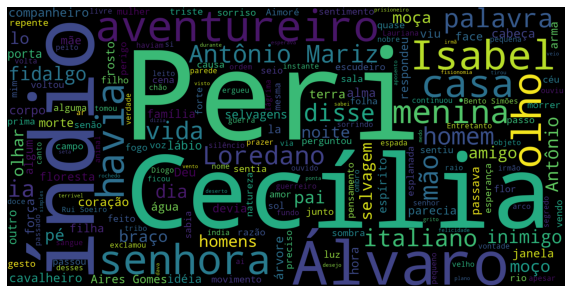

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nuvem = WordCloud(stopwords=stops,
                    background_color='black',
                    width=1600, height=800).generate(texto)
 
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(nuvem, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(nuvem);